In [2]:
import pandas as pd
from scipy.io.arff import loadarff

# Reading the ARFF file
data = loadarff('data/kin8nm.arff')
df = pd.DataFrame(data[0])

X = df.drop('y', axis=1)
y = df['y']

In [3]:
# Splitting the data into 70 30 training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=0)

In [4]:
from sklearn.linear_model import Ridge

# linear regression with Ridge regularization
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [5]:
from sklearn.neural_network import MLPRegressor

# MLP1 with early stopping
mlp1 = MLPRegressor(hidden_layer_sizes=(10, 10), activation='tanh', max_iter=500, random_state=0, early_stopping=True)
mlp1.fit(X_train, y_train)

# MLP2 without early stopping
mlp2 = MLPRegressor(hidden_layer_sizes=(10, 10), activation='tanh', max_iter=500, random_state=0, early_stopping=False)
mlp2.fit(X_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(10, 10), max_iter=500,
             random_state=0)

In [6]:
from sklearn.metrics import mean_absolute_error

# compute mean absolute error
y_pred = ridge.predict(X_test)
print('Linear Regression MAE: %f' % mean_absolute_error(y_test, y_pred))

y_pred = mlp1.predict(X_test)
print('MLP MAE with early stopping: %f' % mean_absolute_error(y_test, y_pred))

y_pred = mlp2.predict(X_test)
print('MLP MAE without early stopping: %f' % mean_absolute_error(y_test, y_pred))

Linear Regression MAE: 0.162830
MLP MAE with early stopping: 0.068041
MLP MAE without early stopping: 0.097807


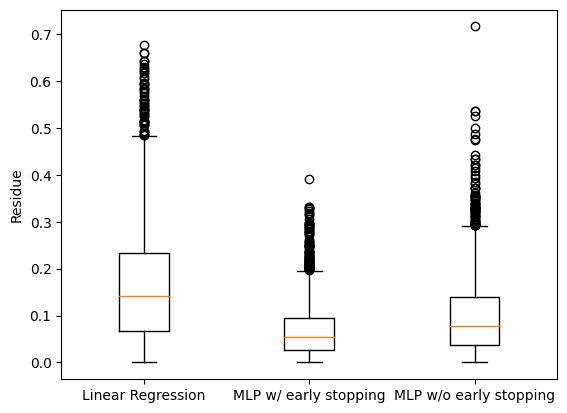

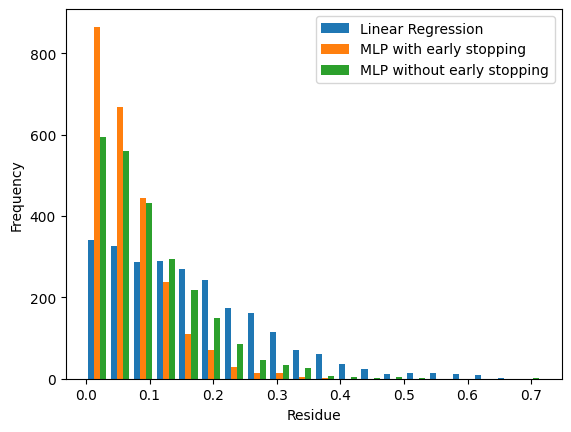

In [12]:
# Plot the residues (in absolute value) using two visualizations: boxplots and histograms
import matplotlib.pyplot as plt

# boxplot
plt.boxplot([abs(y_test - ridge.predict(X_test)), abs(y_test - mlp1.predict(X_test)), abs(y_test - mlp2.predict(X_test))])
plt.xticks([1, 2, 3], ['Linear Regression', 'MLP w/ early stopping', 'MLP w/o early stopping'])
plt.ylabel('Residue')
plt.show()

# histogram
plt.hist([abs(y_test - ridge.predict(X_test)), abs(y_test - mlp1.predict(X_test)), abs(y_test - mlp2.predict(X_test))], bins=20, label=['Linear Regression', 'MLP with early stopping', 'MLP without early stopping'])
plt.legend()
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.show()


In [20]:
#count number of iterations of mlps
print('MLP1 iterations: %d' % mlp1.n_iter_)
print('MLP2 iterations: %d' % mlp2.n_iter_)

MLP1 iterations: 452
MLP2 iterations: 77
